<a href="https://colab.research.google.com/github/developer239/samurai-notebook/blob/main/samurai_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAMURAI Demo with Custom Video**

This notebook demonstrates how to use **SAMURAI** for zero-shot visual tracking on a custom video. You will be able to:

- Upload your own video.
- Extract and download the first frame for external annotation.
- Input the bounding box coordinates back into the notebook.
- Run the SAMURAI demo to perform zero-shot visual tracking.
- View or download the output results.

## **Table of Contents**

1. [Enable GPU in Google Colab](#enable-gpu)
2. [Setup](#setup)
3. [Upload Your Video](#upload-video)
4. [Extract and Download the First Frame](#extract-frame)
5. [Input the Bounding Box Coordinates](#input-bbox)
6. [Run the Demo](#run-demo)
7. [View the Results](#view-results)
8. [Conclusion](#conclusion)

<a id='enable-gpu'></a>
## **1. Enable GPU in Google Colab**

To run SAMURAI efficiently, you need to enable GPU acceleration in your Colab runtime.

### **Steps to Enable GPU:**

1. **Go to the menu bar at the top and select** `Runtime` > `Change runtime type`.
2. **In the dialog that appears, set** `Hardware accelerator` **to** `GPU`.
3. **Click** `Save`.

After changing the runtime, you need to **rerun the setup cells** to reinstall the dependencies.

<a id='setup'></a>
## **2. Setup**

First, let's define base directory and install the required dependencies and clone the repository.

In [21]:
import os

# Define the base directory (the directory where the notebook is running)
base_dir = "/content"
print(f"Base directory: {base_dir}")

Base directory: /content


In [2]:
# Clone the SAMURAI repository
!git clone https://github.com/yangchris11/samurai.git

fatal: destination path 'samurai' already exists and is not an empty directory.


In [3]:
# Install additional dependencies
!pip install loguru tikzplotlib jpeg4py opencv-python lmdb pandas scipy

In [5]:
# Install SAM2
!pip install -e ./samurai/sam2
!pip install -e "./samurai/sam2[notebooks]"

Obtaining file:///content/samurai/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-cp310-cp310-linux_x86_64.whl size=13390 sha256=288d6e1bc0f31dc29a09c80418dc78cf31b618b2aab146a7a56cf79464cc7fb7
  Stored in directory: /tmp/pip-ephem-wheel-cache-hm2vkng4/wheels/8f/f4/b4/4cfd8cc457fb923556d69f1c5fd38928c37cfca759666f3851
Successfully built SAM-2
  Attempting uninstall: SAM-2
    Found existing installation: SAM-2 1.0
    Uninstalling SAM-2-1.0:
      Successfully uninstalled SAM-2-1.0
Obtaining file:///content/samurai/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.tom

In [6]:
# Download SAM2.1 checkpoints
checkpoints_dir = os.path.join(base_dir, 'samurai', 'sam2', 'checkpoints')
os.chdir(checkpoints_dir)
!chmod +x download_ckpts.sh
!./download_ckpts.sh
os.chdir(base_dir)  # Return to base directory

--2024-11-24 21:09:44--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.25, 13.226.210.78, 13.226.210.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt.1’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   102MB/s    in 1.5s    

2024-11-24 21:09:46 (102 MB/s) - ‘sam2.1_hiera_tiny.pt.1’ saved [156008466/156008466]

--2024-11-24 21:09:46--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.25, 13.226.210.78, 13.226.210.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184416285 (1

<a id='upload-video'></a>
## **3. Upload Your Video**

You can upload your custom video file to the notebook.

In [39]:
from google.colab import files
import os

# Upload your video file
print("Please upload your video file (e.g., .mp4, .avi):")
uploaded = files.upload()

# Get the video file path
video_path = list(uploaded.keys())[0]
print(f"Uploaded video: {video_path}")

Please upload your video file (e.g., .mp4, .avi):


Saving fixed-input.mp4 to fixed-input (1).mp4
Uploaded video: fixed-input (1).mp4


<a id='extract-frame'></a>
## **4. Extract and Download the First Frame**

We will extract the first frame from your video and provide a download link so you can annotate it externally.

First frame saved as /content/first_frame.jpg


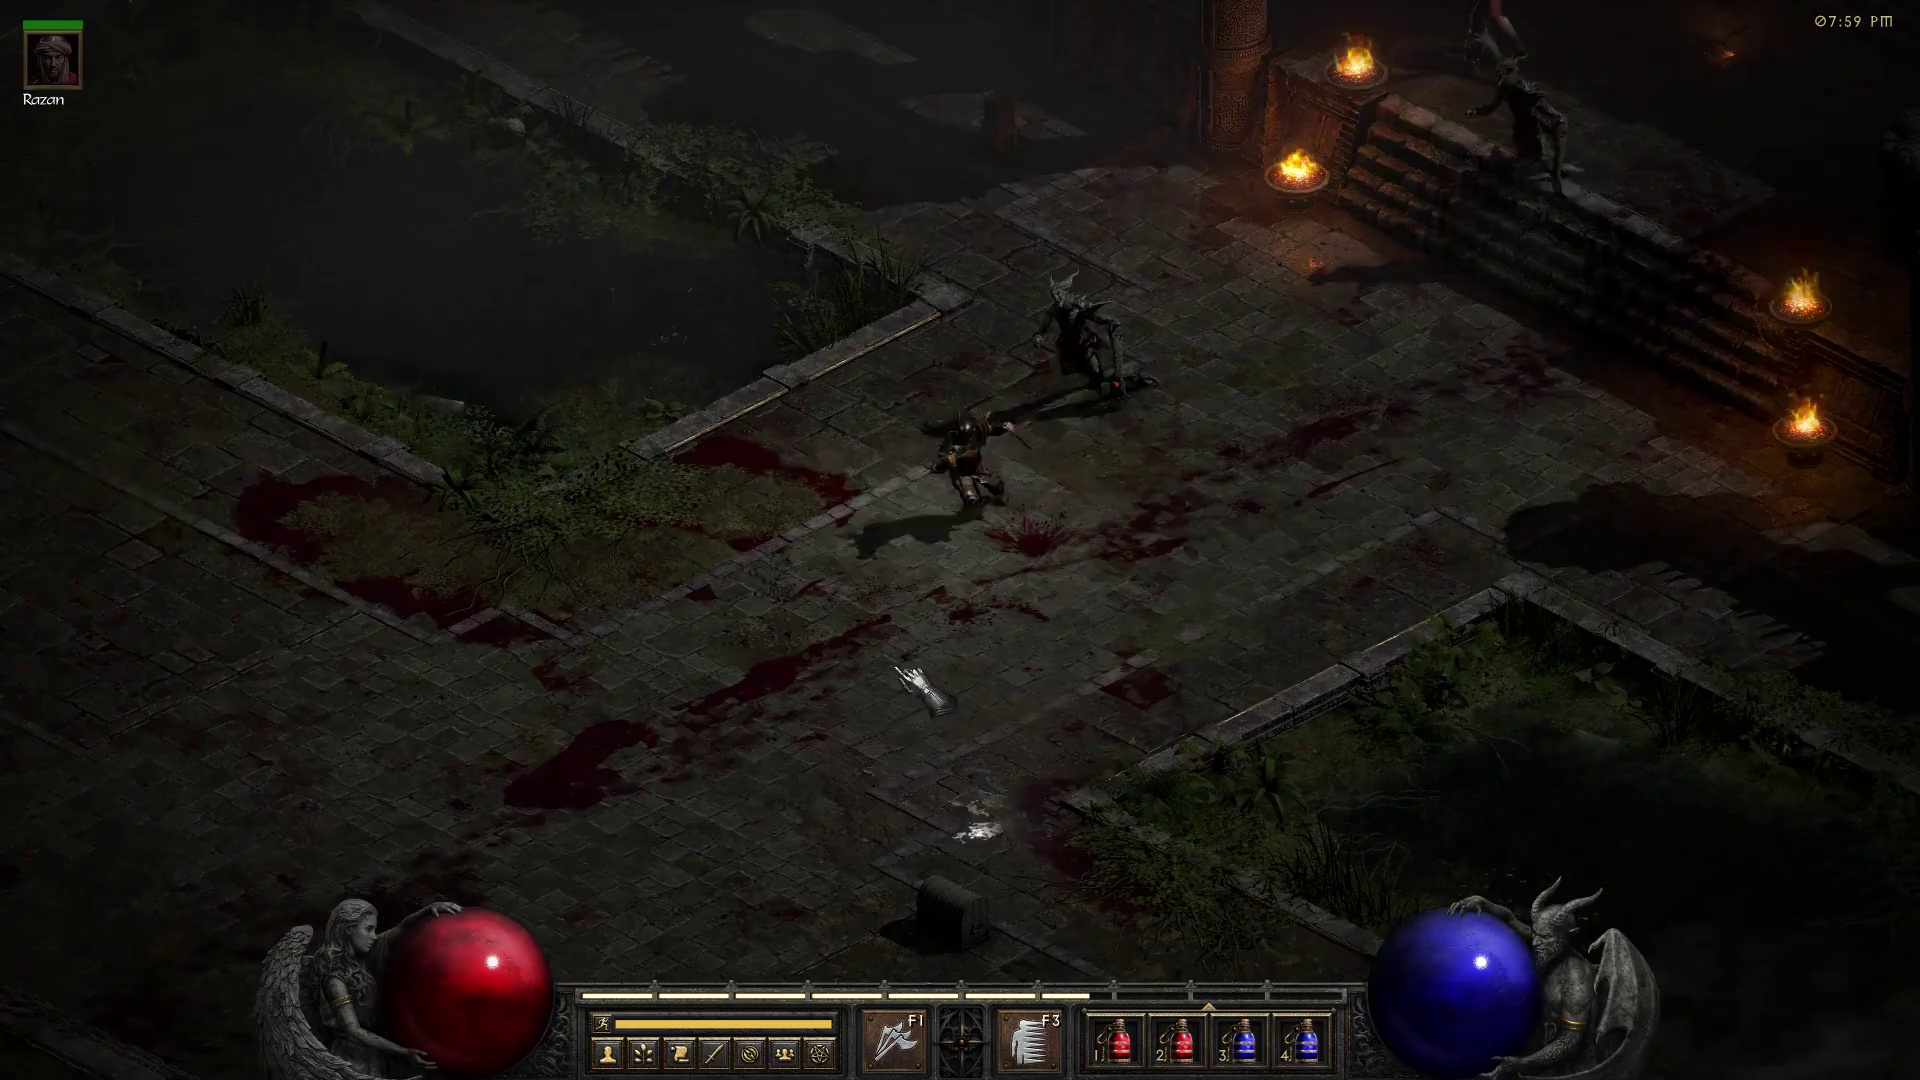

You can download the first frame image to annotate it externally.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
import cv2

# Open the video file
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to read the video.")
else:
    # Save the first frame as an image
    first_frame_path = os.path.join(base_dir, 'first_frame.jpg')
    cv2.imwrite(first_frame_path, frame)
    print(f"First frame saved as {first_frame_path}")

    # Display the image
    from IPython.display import Image, display
    display(Image(first_frame_path))

    # Provide a download link
    from google.colab import files
    print("You can download the first frame image to annotate it externally.")
    files.download(first_frame_path)

<a id='input-bbox'></a>
## **5. Input the Bounding Box Coordinates**

Now, we'll prompt you to input the bounding box coordinates you obtained from your external annotation.

In [35]:
import os

print(f"Current working directory: {os.getcwd()}")

print("Please enter the bounding box coordinates for the target object.")
print("You can enter either:")
print("- Top-left and bottom-right coordinates: x1 y1 x2 y2")
print("- Or top-left coordinates with width and height: x y w h")
print("Coordinates should be in pixels and separated by spaces.")

# Function to parse input
def parse_bbox_input(bbox_input):
    coords = [float(coord) for coord in bbox_input.strip().split()]
    if len(coords) == 4:
        return coords
    else:
        raise ValueError

# Loop until valid input is received
while True:
    bbox_input = input("Enter coordinates: ")
    try:
        bbox = parse_bbox_input(bbox_input)
        if bbox[2] > 0 and bbox[3] > 0:
            # Assuming input is x y w h
            x, y, w, h = bbox
        else:
            # Assuming input is x1 y1 x2 y2
            x1, y1, x2, y2 = bbox
            x, y = x1, y1
            w = x2 - x1
            h = y2 - y1
            bbox_line = f"{x},{y},{w},{h}"
            txt_path = os.path.join(base_dir, 'first_frame_bbox.txt')
            with open(txt_path, 'w') as f:
                f.write(bbox_line)
        break
    except ValueError:
        print("Invalid input. Please enter four numbers separated by spaces.")
        continue

Current working directory: /content/samurai
Please enter the bounding box coordinates for the target object.
You can enter either:
- Top-left and bottom-right coordinates: x1 y1 x2 y2
- Or top-left coordinates with width and height: x y w h
Coordinates should be in pixels and separated by spaces.
Enter coordinates: 1027 266 137 150


<a id='run-demo'></a>
## **6. Run the Demo**

Now that we have the video and the initial bounding box, we can run the SAMURAI demo.

In [41]:
# Update video_path and txt_path to absolute paths
video_path = os.path.abspath(video_path)
txt_path = os.path.abspath(txt_path)
print(f"Absolute video path: {video_path}")
print(f"Absolute txt path: {txt_path}")

Absolute video path: /content/samurai/fixed-input (1).mp4
Absolute txt path: /content/first_frame_bbox.txt


In [44]:
repo_dir = os.path.join(base_dir, 'samurai')
os.chdir(repo_dir)

# Wrap the paths in quotes to handle spaces and special characters
!python scripts/demo.py --video_path "{video_path}" --txt_path "{txt_path}"

/content/samurai/./sam2/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()
SAMURAI mode: True
propagate in video: 100% 208/208 [01:10<00:00,  2.95it/s]


<a id='view-results'></a>
## **7. View the Results**

After the demo script finishes, you can view or download the output video.

**Note:** According to the `scripts/demo.py`, the output video is saved as **`demo.mp4`** by default.

In [ ]:
import os

# Output video path as defined in demo.py (default is 'demo.mp4')
output_video_path = os.path.join(base_dir, 'samurai', 'demo.mp4')

# Check if the output video exists
if os.path.exists(output_video_path):
    print("Output video generated successfully.")
    # Display the video
    from IPython.display import Video, display
    display(Video(output_video_path, embed=True, width=600))

    # Provide a download link
    from google.colab import files
    print("You can download the output video.")
    files.download(output_video_path)
else:
    print("Output video not found.")

<a id='conclusion'></a>
## **8. Conclusion**

By following these steps, you can:

- Upload your own custom video.
- Extract and download the first frame for external annotation.
- Input the bounding box coordinates back into the notebook.
- Run the SAMURAI demo to perform zero-shot visual tracking.
- View or download the output results.

**Feel free to experiment with different videos and bounding boxes to see how SAMURAI performs!**